In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import cfgrib
import cf2cdm
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import xarray as xr
import urllib.request

In [2]:
print('cfgrib version:', cfgrib.__version__)
print('xarray version:', xr.__version__)

cfgrib version: 0.9.8.5
xarray version: 0.16.0


#### set up curl url for specific variables

In [3]:
date = '20180422'
hour = '06'
file_name = 'hrrr.t'+hour+'z.'+date+'.grib2'

var = 'PWAT'
id_begin = 51709498
id_end = 52480660

In [4]:
url = 'curl -o ' + file_name + ' --range ' + str(id_begin) + '-' + str(id_end) + \
      ' https://pando-rgw01.chpc.utah.edu/hrrr/sfc/'+date+'/hrrr.t'+hour+'z.wrfsfcf00.grib2'

In [5]:
os.chdir('/data2/willytsai')
out = os.system(url)

In [6]:
from cfgrib.xarray_store import open_dataset

In [7]:
ds = open_dataset('hrrr.t00z.wrfsfcf00.grib2',engine='cfgrib',
                 backend_kwargs=dict(filter_by_keys={'typeOfLevel':'unknown'}))

In [8]:
pwat = ds['pwat']

In [9]:
sH = ds[list(ds)[0]]

lc_HRRR_kwargs = {
    'globe' : ccrs.Globe(ellipse='sphere'),
    'central_latitude'   : sH.GRIB_LaDInDegrees,
    'central_longitude'  : sH.GRIB_LoVInDegrees,
    'standard_parallels' : (sH.GRIB_Latin1InDegrees, \
                            sH.GRIB_Latin2InDegrees)}

lc = ccrs.LambertConformal(**lc_HRRR_kwargs)
lc

/home/willytsai/anaconda3/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


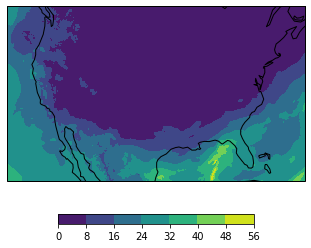

In [12]:
ax = plt.subplot(projection=lc)
img = ax.contourf(pwat.longitude, pwat.latitude
                , pwat, transform=ccrs.PlateCarree())
ax.coastlines()

plt.colorbar(img, ax=ax, orientation='horizontal', fraction=0.045)